In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def plotsequences(t = 't0', mod = 'H2AK5ac', nn_type = 'Compound', a = 0.4, b = 0.9, index = 0):
    ddir = f"{nn_type}/{t}/{mod}_{t}/a_{a}_b_{b}"
    fname = f'{mod}_{t}_filtered_a{str(a).replace(".", "_")}_b{str(b).replace(".", "_")}'

    biterrors = pd.read_csv(f'{ddir}/{fname}_biterror_n100.csv')
    biterrors = biterrors['biterror']
    mother_sequences = np.genfromtxt(f'{ddir}/{fname}_sequences_n100.csv', delimiter=',')
    corrupted_daughters = np.genfromtxt(f'{ddir}/{fname}_corrupt_daughter_sequences_n100.csv', delimiter=',')
    corrected_daughters = np.genfromtxt(f'{ddir}/{fname}_corrected_daughter_sequences_n100.csv', delimiter=',')


    # print(biterrors.iloc[index])
    # print(mother_sequences[index])
    # print(corrupted_daughters[index])
    # print(corrected_daughters[index])

    # each is a list of 0s and 1s.
    # plot the sequences as 3 subplots one below the other with a bar at each position wherever there is a 1 and no bar where there is a 0
    fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    axs[0].bar(range(len(mother_sequences[index])), mother_sequences[index], color='blue')
    axs[1].bar(range(len(corrupted_daughters[index])), corrupted_daughters[index], color='orange')
    axs[2].bar(range(len(corrected_daughters[index])), corrected_daughters[index], color='green')
    axs[0].set_title(f'Mother Sequence - Sequence Plots {mod}_{t}_a{a}_b{b}_index{index}')
    axs[1].set_title('Corrupted Daughter Sequence')
    axs[2].set_title(f'Corrected Daughter Sequence - Biterror {biterrors.iloc[index]}')
    plt.xlabel('Position')
    plt.tight_layout()
    plt.show()  # Explicitly show the plot
    # Remove the return statement to prevent implicit rendering


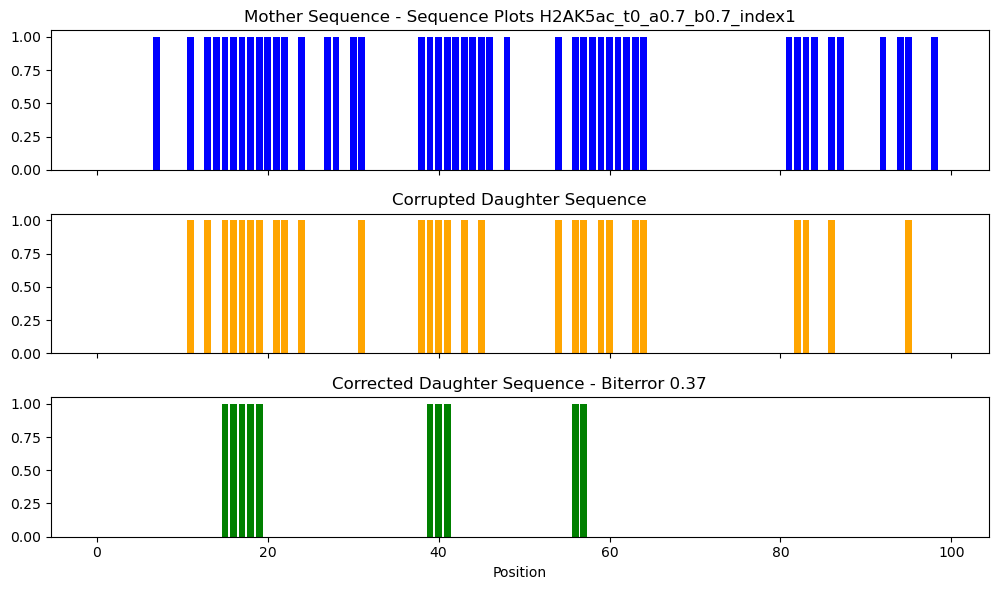

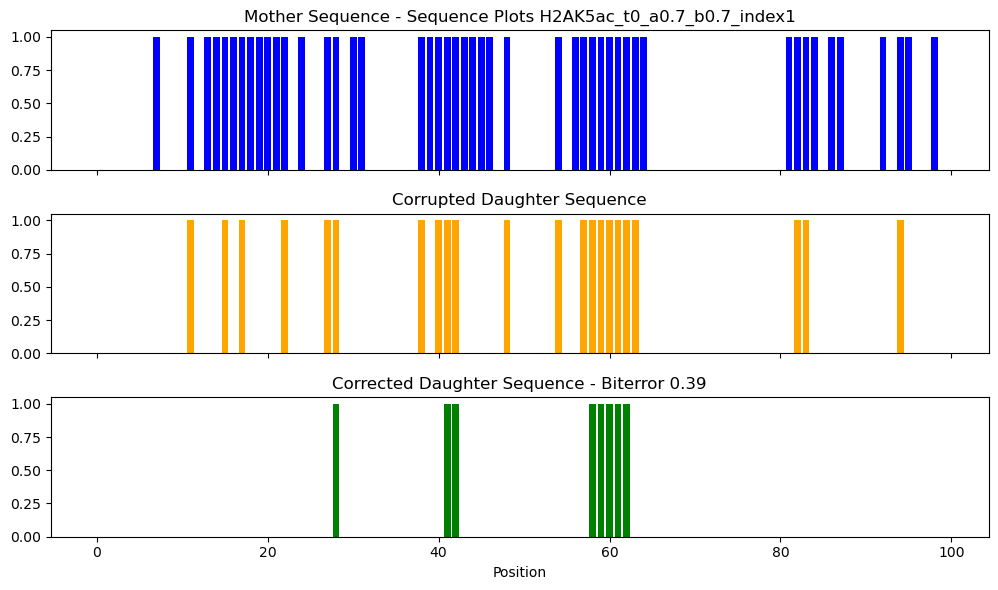

In [95]:
t = 't0'
mod = 'H2AK5ac'
a = 0.7
b = 0.7
index = 1
plotsequences(t = t, mod = mod, nn_type = 'Compound', a = a, b = b, index = index)
plotsequences(t = t, mod = mod, nn_type = 'Targeted', a = a, b = b, index = index)


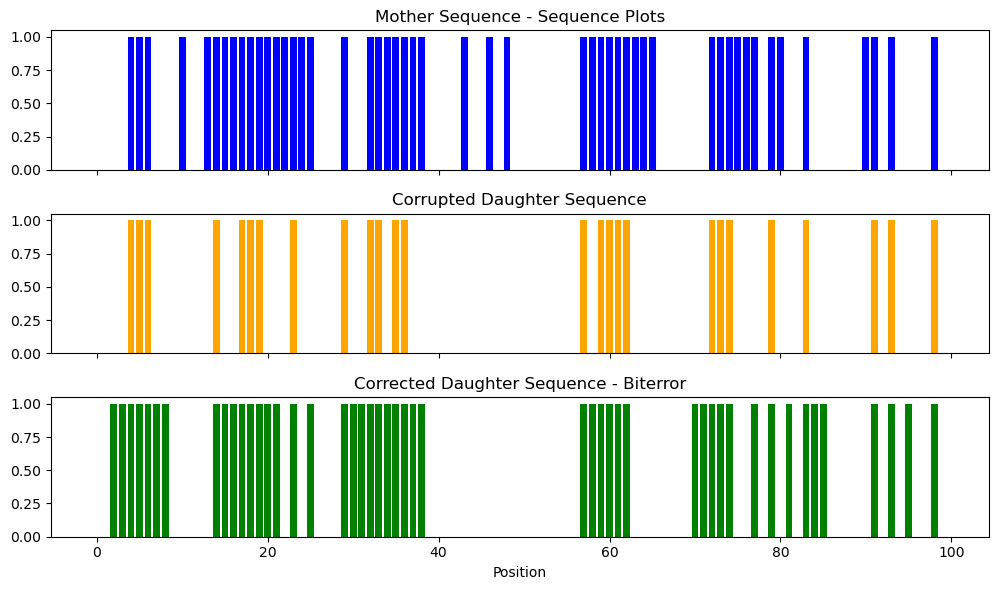

In [100]:
mother_sequences = np.genfromtxt(f'/home/bprabhu/Desktop/IBAB_Work/antagonistic-PTM-NN/Compound_MA_DA/Range_Test_No_Anta/Mom_list.csv', delimiter=',')
corrupted_daughters = np.genfromtxt(f'/home/bprabhu/Desktop/IBAB_Work/antagonistic-PTM-NN/Compound_MA_DA/Range_Test_No_Anta/Corrupt_Daughter.csv', delimiter=',')
corrected_daughters = np.genfromtxt(f'/home/bprabhu/Desktop/IBAB_Work/antagonistic-PTM-NN/Compound_MA_DA/Range_Test_No_Anta/Correct_Daughter.csv', delimiter=',')

def calculate_alpha_beta(binary_sequence):
    """
    Calculates alpha and beta values for a given binary sequence.
    Alpha is the transition probability from 1 to 1, and Beta is from 0 to 0.

    Parameters:
    binary_sequence (str): A string of binary digits (1s and 0s).

    Returns:
    tuple: A tuple containing the alpha and beta values.
    """
    n11, n10, n01, n00 = 0, 0, 0, 0
    sequence = [int(bit) for bit in binary_sequence]

    for i in range(1, len(sequence)):
        if sequence[i - 1] == 1 and sequence[i] == 1:
            n11 += 1
        elif sequence[i - 1] == 1 and sequence[i] == 0:
            n10 += 1
        elif sequence[i - 1] == 0 and sequence[i] == 1:
            n01 += 1
        elif sequence[i - 1] == 0 and sequence[i] == 0:
            n00 += 1

    alpha = n11 / (n11 + n10) if (n11 + n10) > 0 else 0
    beta = n00 / (n00 + n01) if (n00 + n01) > 0 else 0

    return alpha, beta


for i in range(len(mother_sequences)):
    alpha, beta = calculate_alpha_beta(mother_sequences[i])
    # print('seq:', i, ' alpha:', alpha, ' beta:', beta)
    req_alpha = 0.7
    req_beta = 0.7
    if abs(alpha - req_alpha) < 0.01 and abs(beta - req_beta) < 0.01:
        index = i
        break


# print(biterrors.iloc[index])
# print(mother_sequences[index])
# print(corrupted_daughters[index])
# print(corrected_daughters[index])

# each is a list of 0s and 1s.
# plot the sequences as 3 subplots one below the other with a bar at each position wherever there is a 1 and no bar where there is a 0
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
axs[0].bar(range(len(mother_sequences[index])), mother_sequences[index], color='blue')
axs[1].bar(range(len(corrupted_daughters[index])), corrupted_daughters[index], color='orange')
axs[2].bar(range(len(corrected_daughters[index])), corrected_daughters[index], color='green')
axs[0].set_title(f'Mother Sequence - Sequence Plots')
axs[1].set_title('Corrupted Daughter Sequence')
axs[2].set_title(f'Corrected Daughter Sequence - Biterror')
plt.xlabel('Position')
plt.tight_layout()
plt.show()  # Explicitly show the plot
# Remove the return statement to prevent implicit rendering


Using device: cpu
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


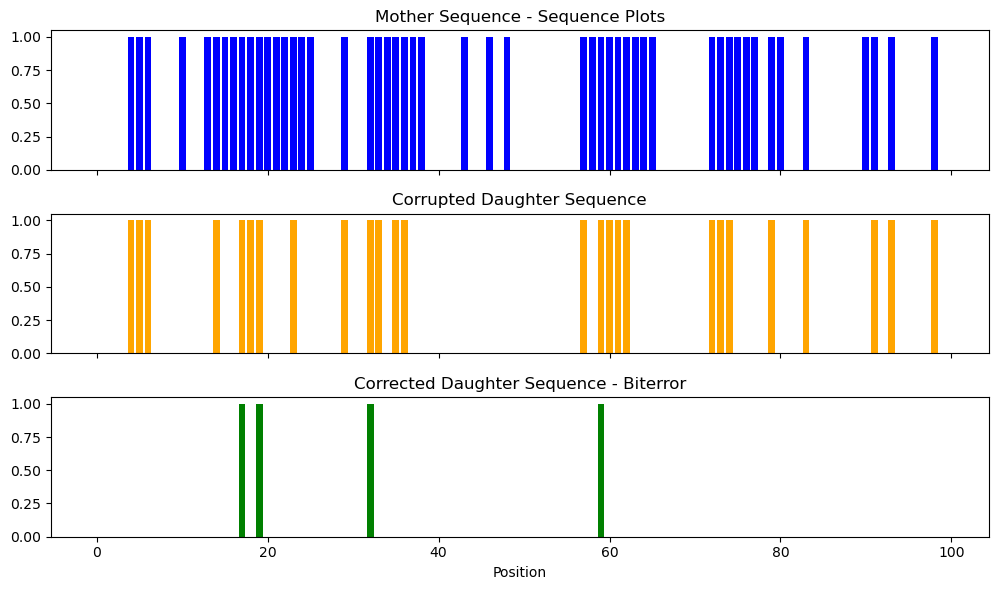

In [111]:
import torch
import torch.nn as nn

class SequencePredictor(nn.Module):
    # Define the neural network architecture
    # (input -> h1 -> h2 .... hn -> output)
    def __init__(self, input_size, hidden_size, output_size, num_hid_layers):
        super(SequencePredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_hid_layers = num_hid_layers

        # This is the first layer which takes in inputs and gives out the outputs for the first hidden layer
        self.input_layer = nn.Linear(input_size, hidden_size)

        # These are the hidden layers
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_hid_layers)])

        # This is the output layer
        self.output_layer = nn.Linear(hidden_size, output_size)

        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.input_layer(x)
        out = self.relu(out)
        for layer in self.hidden_layers:
            out = layer(out)
            out = self.relu(out)

        out = self.output_layer(out)
        return out



# Detect device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = SequencePredictor(input_size=100, hidden_size=150, output_size=100, num_hid_layers=5).to(device)
try:
    model.load_state_dict(torch.load(f'pathfiles/compound_network_weights.pth', map_location=device))
except FileNotFoundError:
    print(f"Compound model weights not found. Skipping correction for this pair.")


# the nn_model variable will contain the neural network with the loaded weights to work with
daughter_input = torch.from_numpy(corrupted_daughters[index]).float()

# Run the predictions.
model.eval()  # To turn off learning mode.
with torch.no_grad():
    new_corrected_daughter = model(daughter_input)
    new_corrected_daughter = new_corrected_daughter.cpu().numpy().astype(int)
    print(new_corrected_daughter)


fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
axs[0].bar(range(len(mother_sequences[index])), mother_sequences[index], color='blue')
axs[1].bar(range(len(daughter_input)), daughter_input, color='orange')
axs[2].bar(range(len(new_corrected_daughter)), new_corrected_daughter, color='green')
axs[0].set_title(f'Mother Sequence - Sequence Plots')
axs[1].set_title('Corrupted Daughter Sequence')
axs[2].set_title(f'Corrected Daughter Sequence - Biterror')
plt.xlabel('Position')
plt.tight_layout()
plt.show()  # Explicitly show the plot
# Remove the return statement to prevent implicit rendering